<a href="https://colab.research.google.com/github/gabiteixeira09/KNN/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregar e Preparar o Dataset **MNIST**


In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os dados para o intervalo [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Achatar (flatten) as imagens para MLP
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Verificar o formato dos dados
print(f"Formato de x_train_flat: {x_train_flat.shape}")
print(f"Formato de y_train: {y_train.shape}")


Formato de x_train_flat: (60000, 784)
Formato de y_train: (60000,)


Construir e Treinar a MLP


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# One-hot encoding dos labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Construir a MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_flat.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train_flat, y_train_cat, epochs=10, validation_data=(x_test_flat, y_test_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8780 - loss: 0.4203 - val_accuracy: 0.9609 - val_loss: 0.1250
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9681 - loss: 0.1064 - val_accuracy: 0.9652 - val_loss: 0.1112
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9789 - loss: 0.0695 - val_accuracy: 0.9738 - val_loss: 0.0862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9782 - val_loss: 0.0720
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9890 - loss: 0.0358 - val_accuracy: 0.9762 - val_loss: 0.0770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0.9770 - val_loss: 0.0822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9795 - val_loss: 0.0788
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9933 - loss: 0.0217 -

imagens do dataset

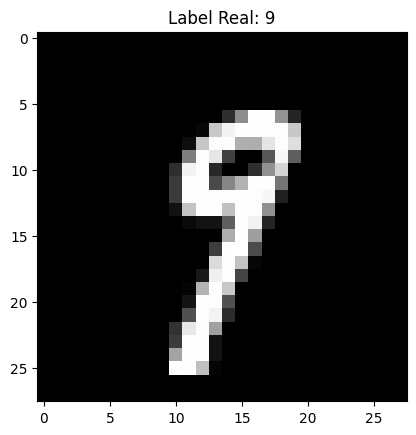

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Classe Prevista: 9



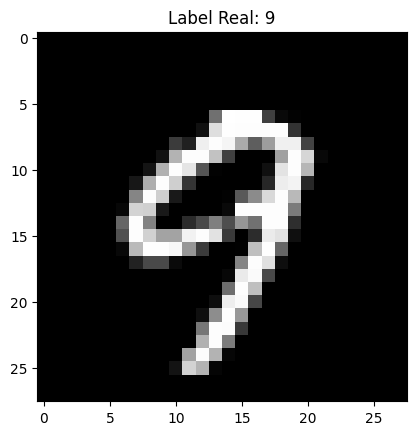

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classe Prevista: 9



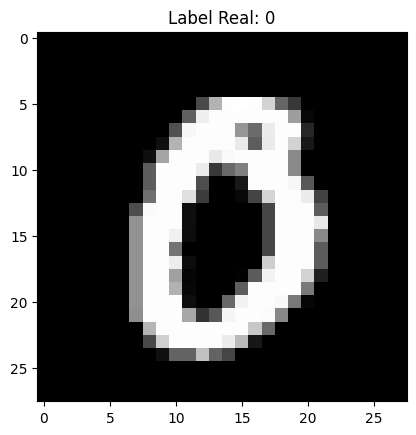

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classe Prevista: 0



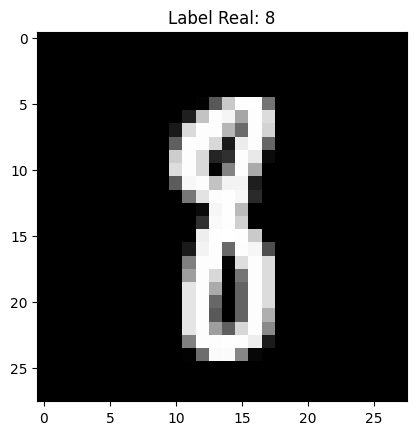

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Classe Prevista: 8



In [89]:
# Selecionar algumas imagens de teste do proprio dataset
num_test_images = 4
indices = np.random.choice(len(x_test), num_test_images)

for i in indices:
    # Exibir a imagem de teste
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label Real: {y_test[i]}")
    plt.show()

    # Pré-processar a imagem (achatar)
    image_flat = x_test[i].reshape(1, 28 * 28)

    # Fazer a previsão
    prediction = model.predict(image_flat)
    predicted_label = np.argmax(prediction)

    print(f"Classe Prevista: {predicted_label}\n")


Carregando as pŕoprias imagens


In [105]:
from google.colab import files

uploaded = files.upload()


Saving numero7.png to numero7.png


Pré-Processar as Imagens Externas

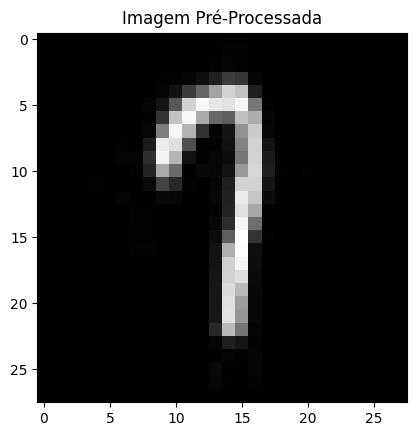

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, invert_colors=False):
    # Carregar a imagem em escala de cinza
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Redimensionar para 28x28 pixels
    img_resized = cv2.resize(img, (28, 28))

    # Inverter a cor apenas se especificado
    if invert_colors:
        img_resized = cv2.bitwise_not(img_resized)

    # Normalizar os valores para [0, 1]
    img_normalized = img_resized / 255.0

    # Achatar a imagem
    img_flat = img_normalized.reshape(1, 28 * 28)

    return img_normalized, img_flat

# Exemplo de uso com uma imagem carregada
image_path = 'numero7.png'
invert_colors = False        # Mudar para True se precisar inverter as cores

img_display, img_input = preprocess_image(image_path, invert_colors)

# Exibir a imagem pré-processada
plt.imshow(img_display, cmap='gray')
plt.title("Imagem Pré-Processada")
plt.show()


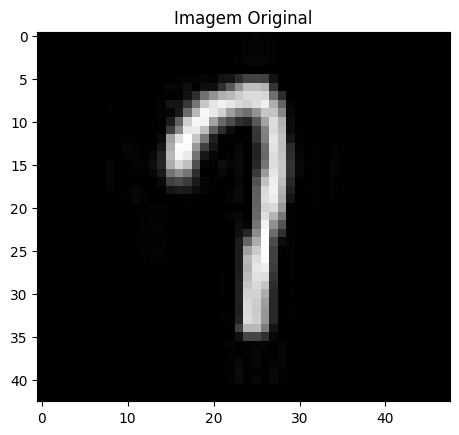

In [108]:
img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_original, cmap='gray')
plt.title("Imagem Original")
plt.show()


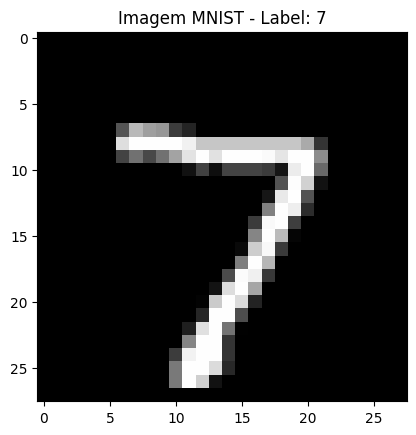

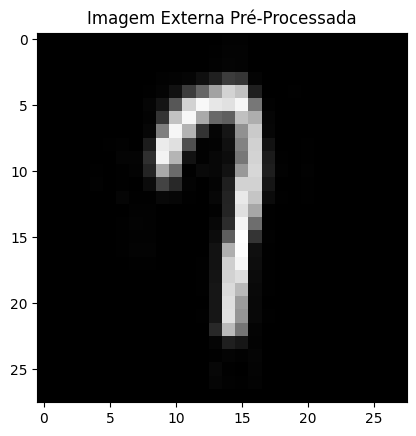

In [109]:
# Exibir uma imagem do MNIST
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Imagem MNIST - Label: {y_test[0]}")
plt.show()

# Exibir a imagem externa pré-processada
plt.imshow(img_display, cmap='gray')
plt.title("Imagem Externa Pré-Processada")
plt.show()


In [110]:
prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(f"Classe Prevista: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Classe Prevista: 7


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Exemplo de construção do modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar e treinar o modelo (exemplo simplificado)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flat, y_train_cat, epochs=5)

# Salvar o modelo em formato .h5
model.save("mnist_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8733 - loss: 0.4326
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9681 - loss: 0.1045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9793 - loss: 0.0677
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9837 - loss: 0.0499
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9886 - loss: 0.0366


In [112]:
from google.colab import files

files.download("mnist_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>